In [1]:

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from swimnetworks import Dense, Linear

from view.visualizer import *

In [2]:
xd = 2  # Input space dimensions
yd = 4  # Output dimension
num_samples = 1000  # Number of data points

dataset = Dataset()
dataset.create_dataset_sinus_2d(num_samples)
dataset.scale(preprocessing.MinMaxScaler())
dataset.split_train_test(0.2)

In [3]:
steps = [
    (
        "dense",
        Dense(layer_width=512, activation="relu", parameter_sampler="relu", random_seed=42),
    ),
    ("linear", Linear(regularization_scale=1e-10)),
]
model_swim = Pipeline(steps)

model_swim.fit(dataset.X_train, dataset.y_train)

model_swim_base = BaseModel()
model_swim_base.weights = [
    model_swim.get_params()["steps"][0][1].weights,
    model_swim.get_params()["steps"][1][1].weights,
]
model_swim_base.biases = [
    -model_swim.get_params()["steps"][0][1].biases[0],
    -model_swim.get_params()["steps"][1][1].biases[0],
]

y_predict = model_swim_base.predict(dataset.X_test)
y_swim = model_swim.predict(dataset.X_test)

print(f"Predictions from 'model_base' and 'model_swim' are equal: {np.array_equal(y_predict, y_swim)}")

Predictions from 'model_base' and 'model_swim' are equal: True


Layer1 sampling: 100%|██████████| 512/512 [00:00<00:00, 6408.75it/s]

5.624441436162565e-28
plot_weight_biases_differences Layer 1
are given weight matrices equal:  False


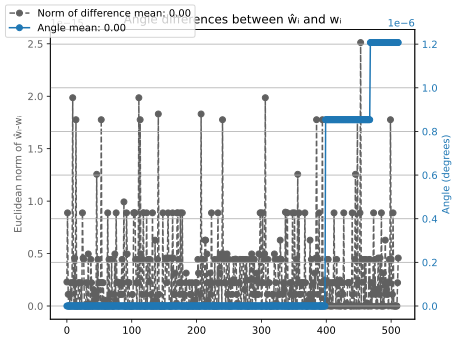

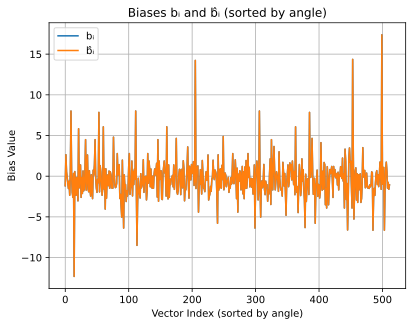

plot_weight_biases_differences Layer 2
are given weight matrices equal:  True


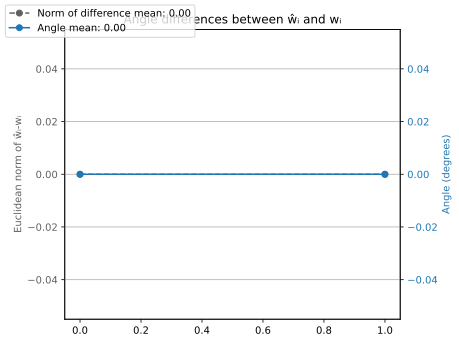

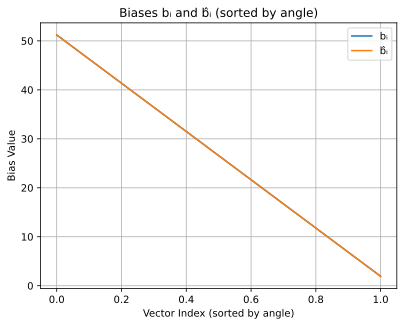

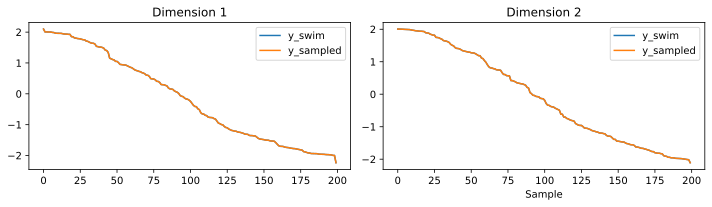

In [4]:
model_sampled = SampledNet()
model_sampled.fit(dataset.X_train, _, model_swim_base, radius=0, layer2="classic")

y_sampled = model_sampled.predict(dataset.X_test)
print(loss_mse(y_predict, y_sampled))

print("plot_weight_biases_differences Layer 1")
plot_weight_biases_differences(model_sampled.weights[0], model_swim_base.weights[0], model_sampled.biases[0],
                               model_swim_base.biases[0])
print("plot_weight_biases_differences Layer 2")
plot_weight_biases_differences(model_sampled.weights[1], model_swim_base.weights[1], model_sampled.biases[1],
                               model_swim_base.biases[1])
visualize_data(y_swim, y_sampled, "y_swim", "y_sampled")